In [1]:
import multimodal_cci as mmcci
import scanpy as sc
import numpy as np
import pandas as pd
import pickle

#### Load stLearn data objects

In [2]:
stlearn = [
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci_benchmarking/sample1_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci_benchmarking/sample2_cci.h5ad"),
    sc.read_h5ad("/scratch/project/stseq/Levi/mmcci_benchmarking/sample3_cci.h5ad")

]

with open('/scratch/project/stseq/Levi/mmcci_benchmarking/squidpy_sample1.pkl', 'rb') as f:
    squidpy1 = pickle.load(f)

with open('/scratch/project/stseq/Levi/mmcci_benchmarking/squidpy_sample2.pkl', 'rb') as f:
    squidpy2 = pickle.load(f)

with open('/scratch/project/stseq/Levi/mmcci_benchmarking/squidpy_sample3.pkl', 'rb') as f:
    squidpy3 = pickle.load(f)

squidpy_cci = [squidpy1, squidpy2, squidpy3]

stlearn_cci = [sample.uns['per_lr_cci_cell_type'] for sample in stlearn]

In [4]:
stlearn_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in stlearn_cci]
squidpy_overalls = [mmcci.it.calculate_overall_interactions(sample) for sample in squidpy_cci]

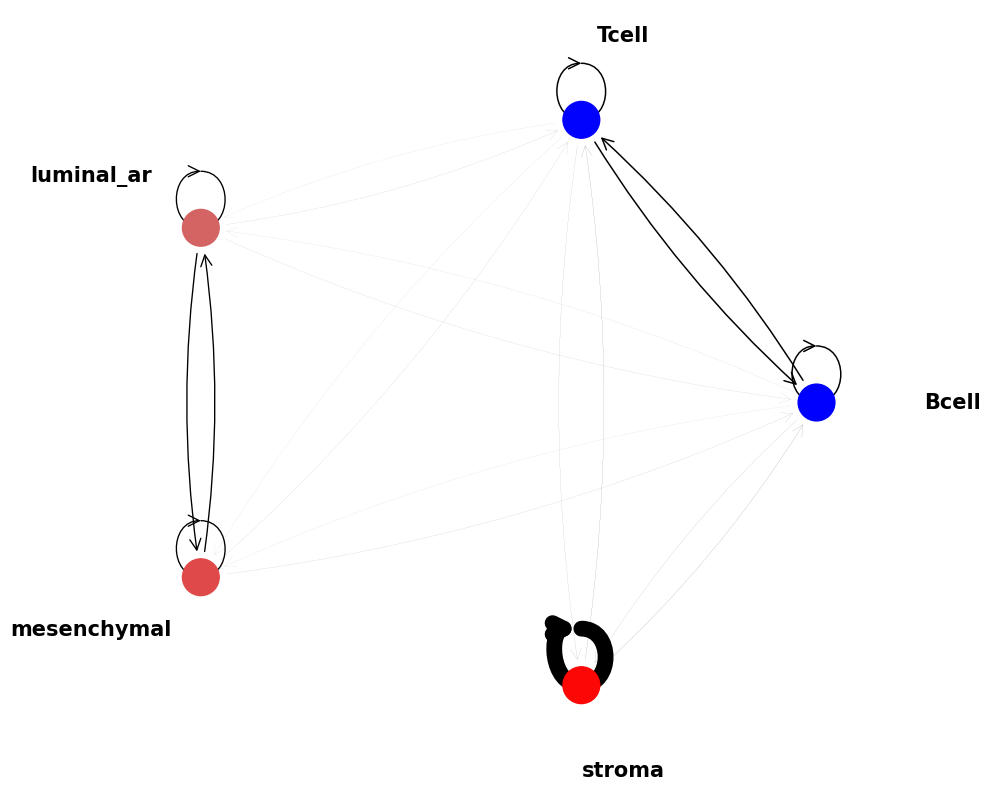

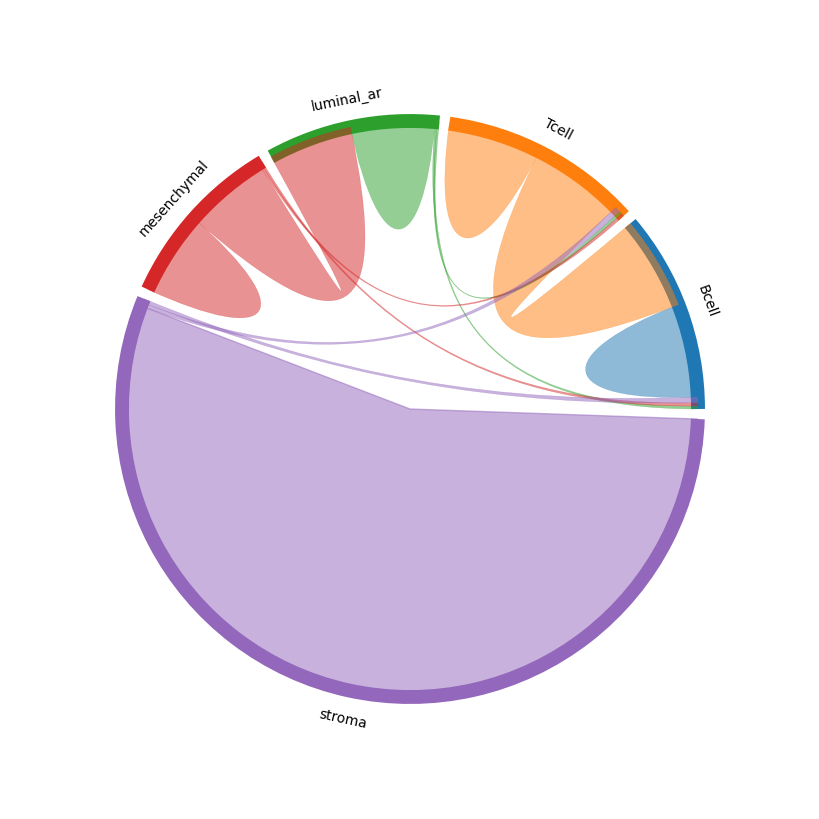

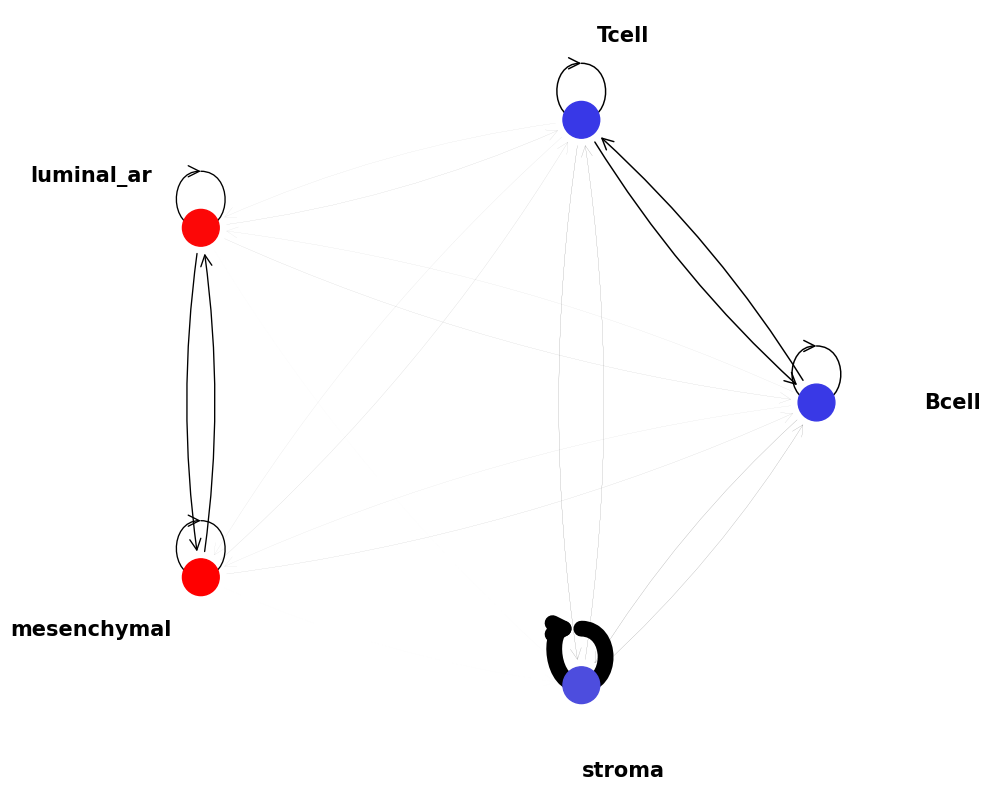

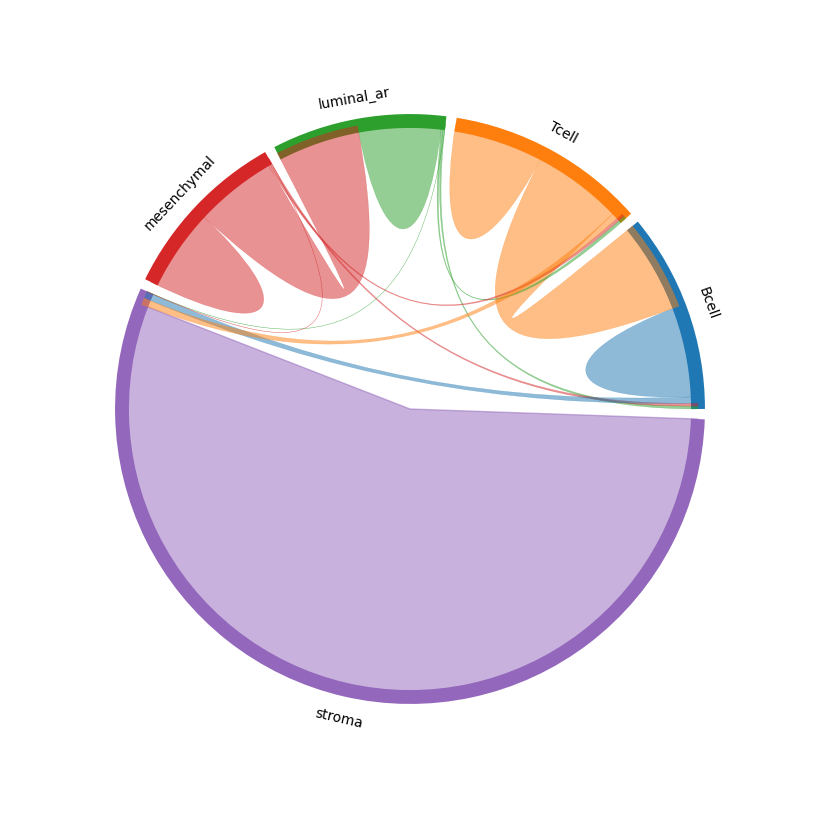

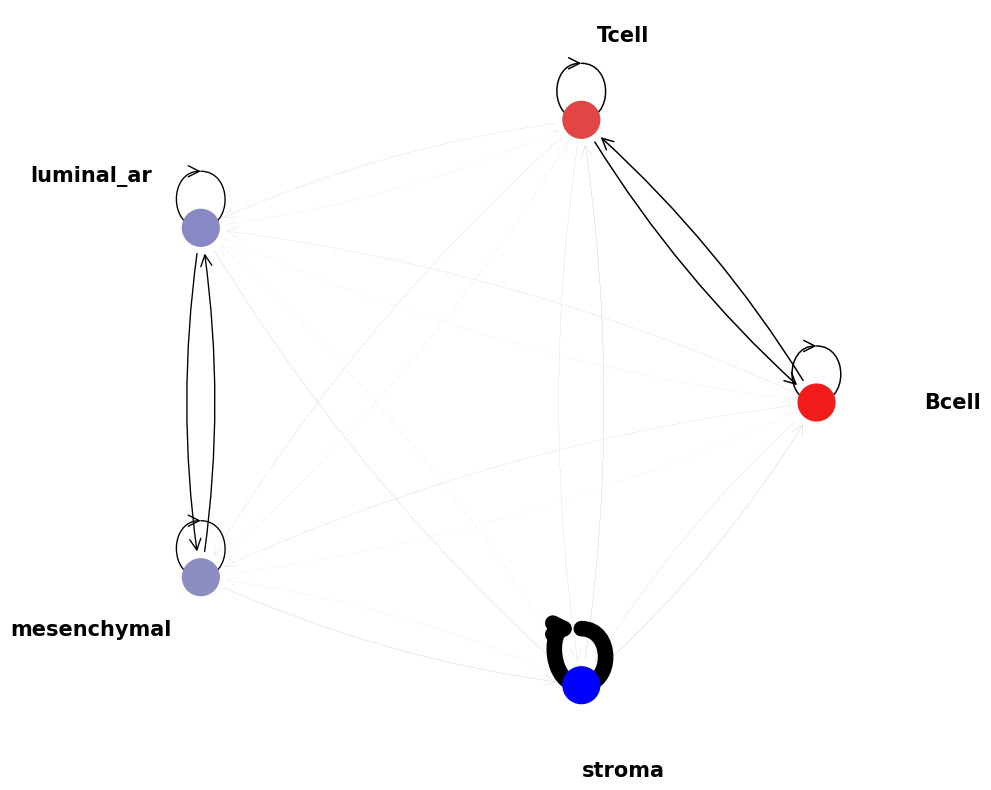

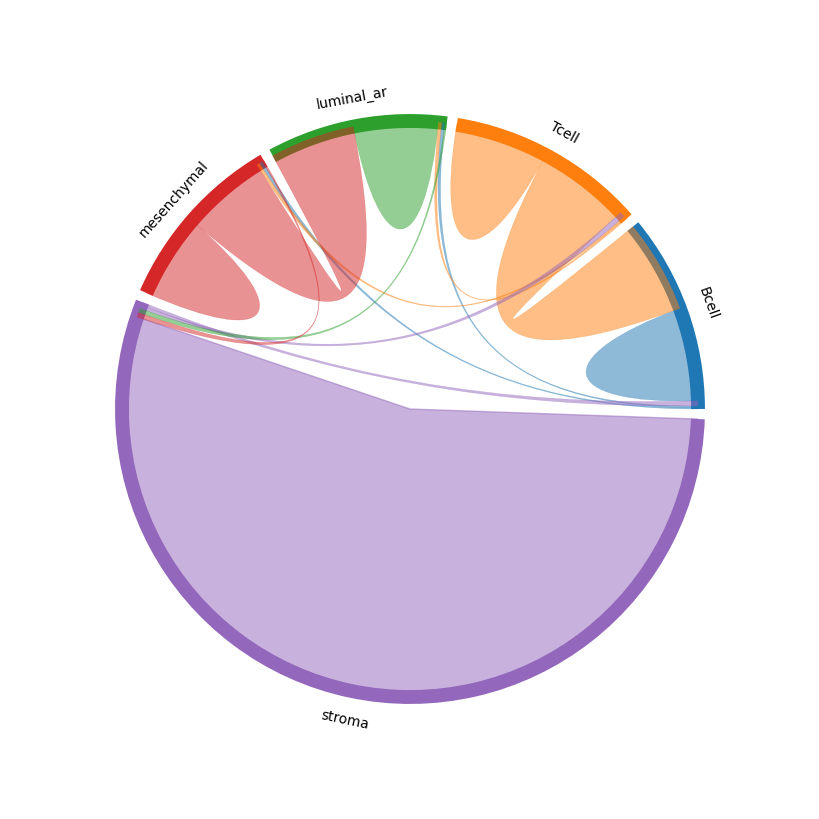

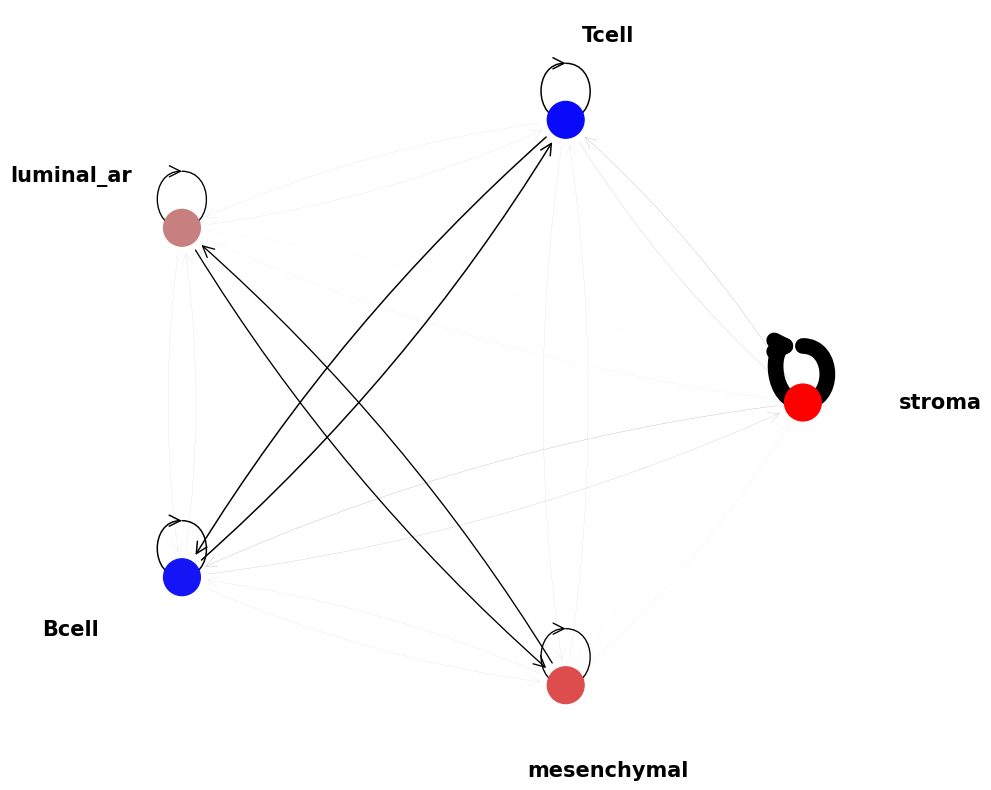

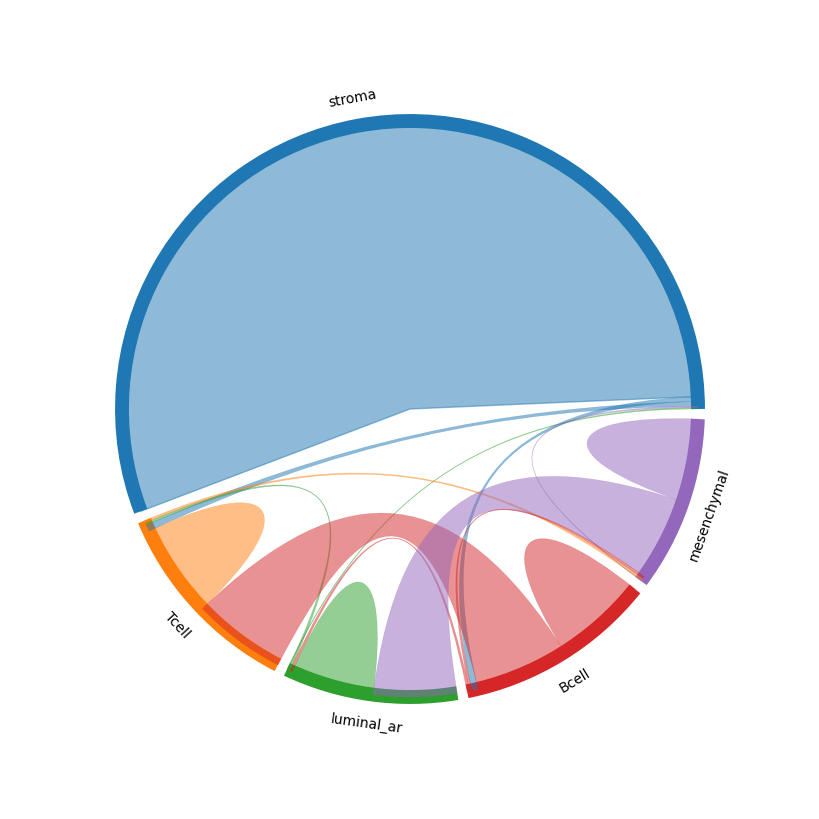

In [6]:
mmcci.plt.network_plot(stlearn_overalls[0])
mmcci.plt.chord_plot(stlearn_overalls[0])
mmcci.plt.network_plot(stlearn_overalls[1])
mmcci.plt.chord_plot(stlearn_overalls[1])
mmcci.plt.network_plot(stlearn_overalls[2])
mmcci.plt.chord_plot(stlearn_overalls[2])

lr_pairs = mmcci.it.get_majority_lr_pairs(stlearn_cci)
stlearn_avg = mmcci.it.get_avg_lr_pairs(stlearn_cci, lr_pairs)
stlearn_overall = mmcci.it.calculate_overall_interactions(stlearn_avg)
mmcci.plt.network_plot(stlearn_overall)
mmcci.plt.chord_plot(stlearn_overall)

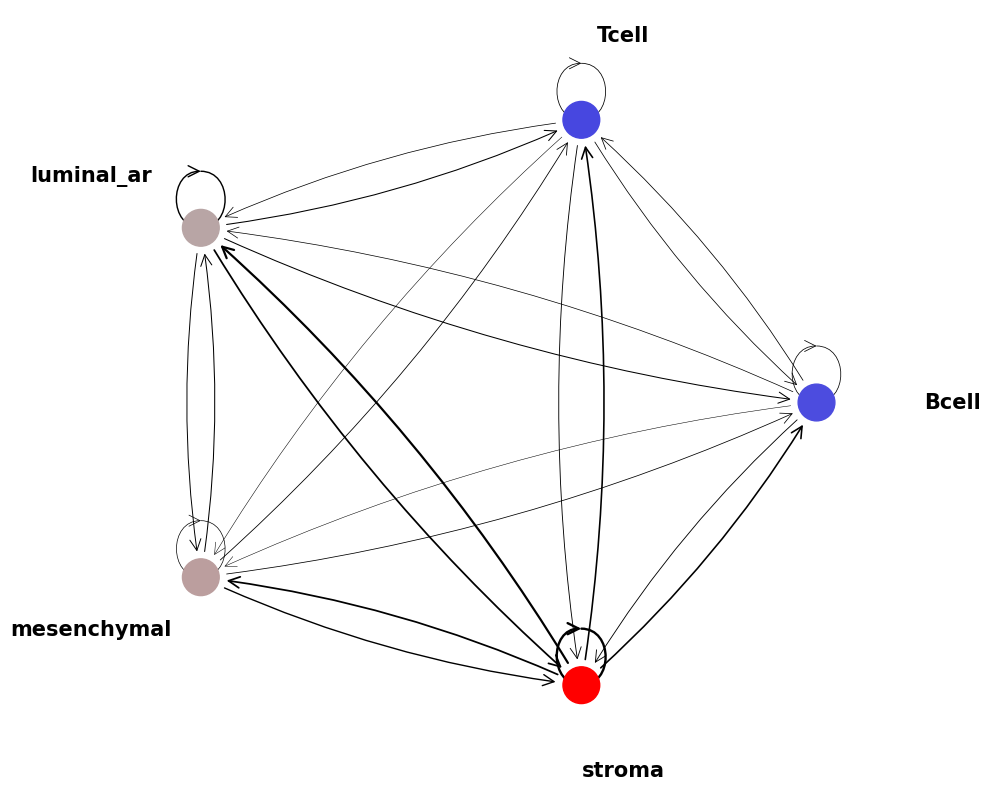

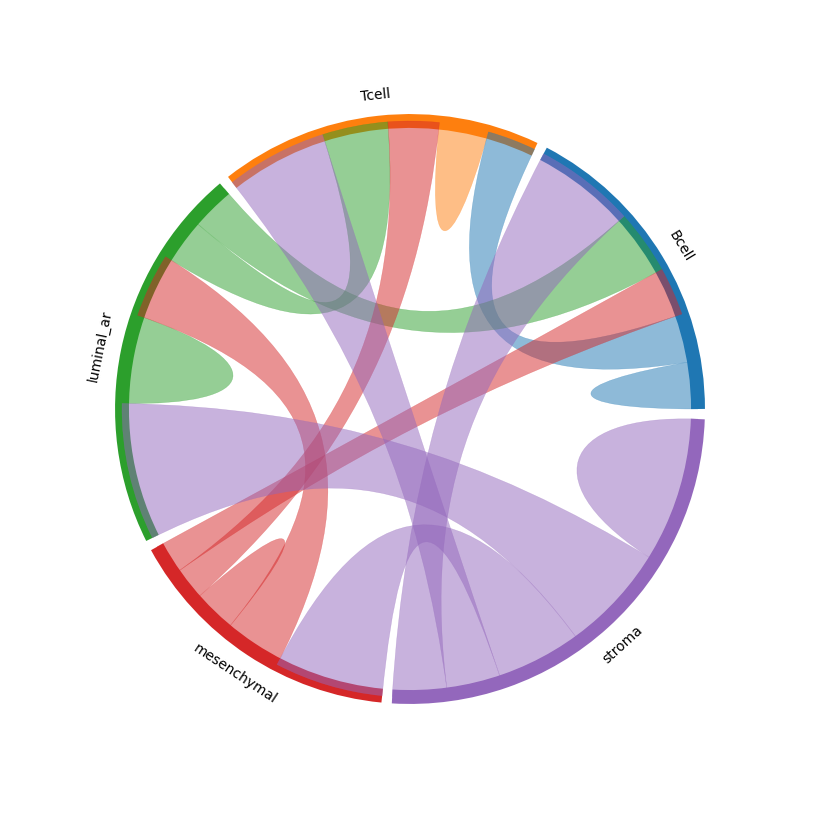

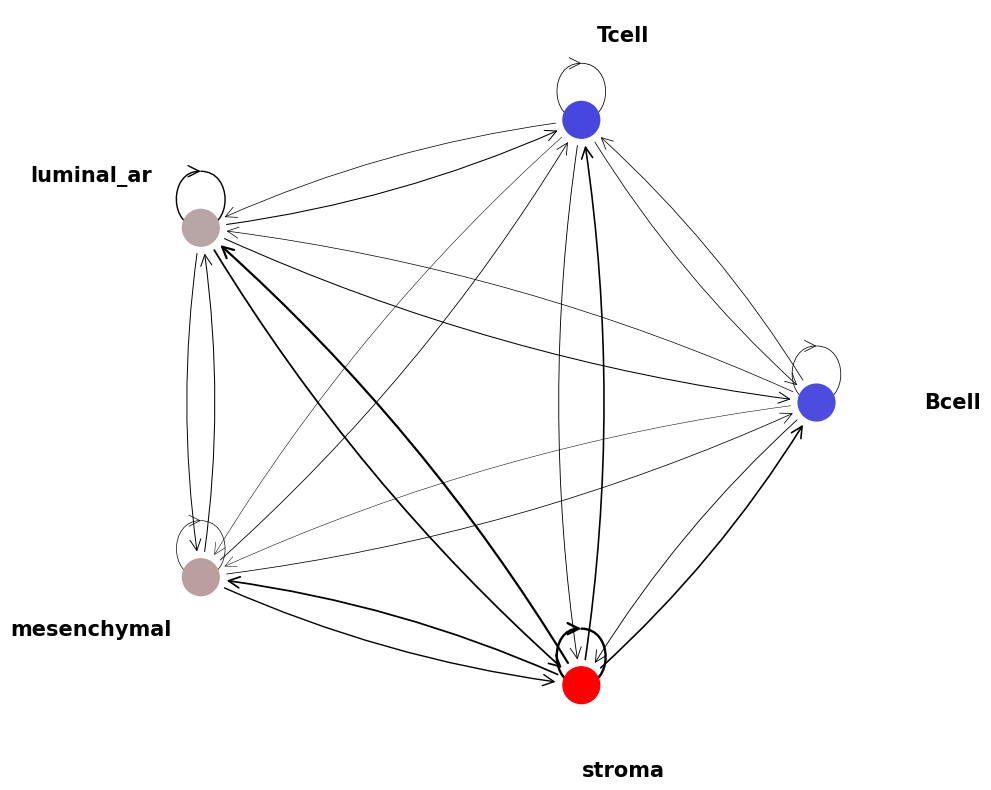

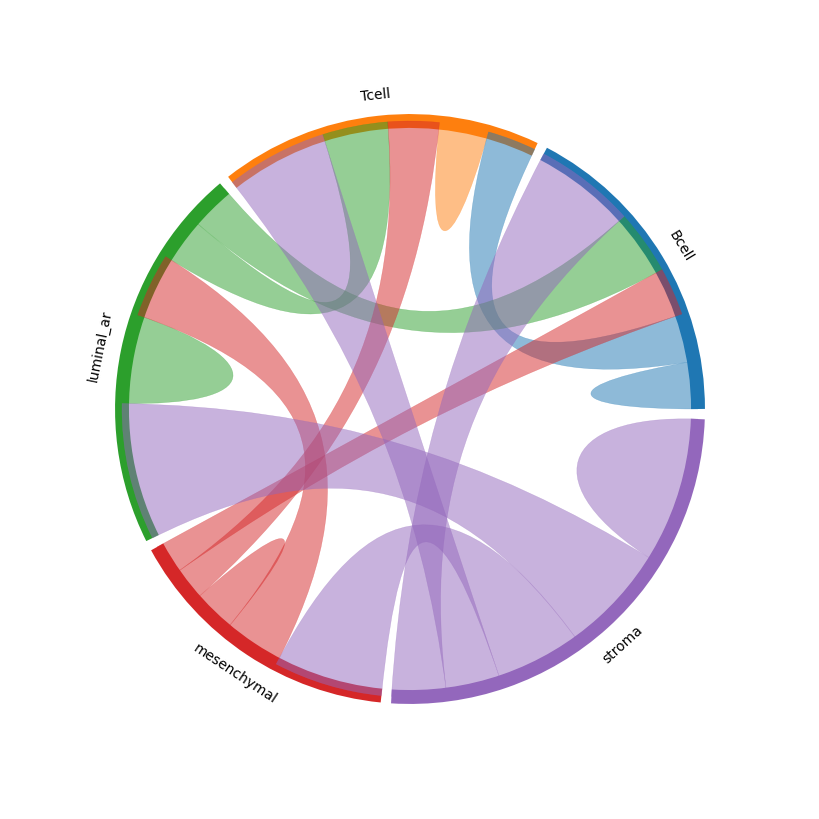

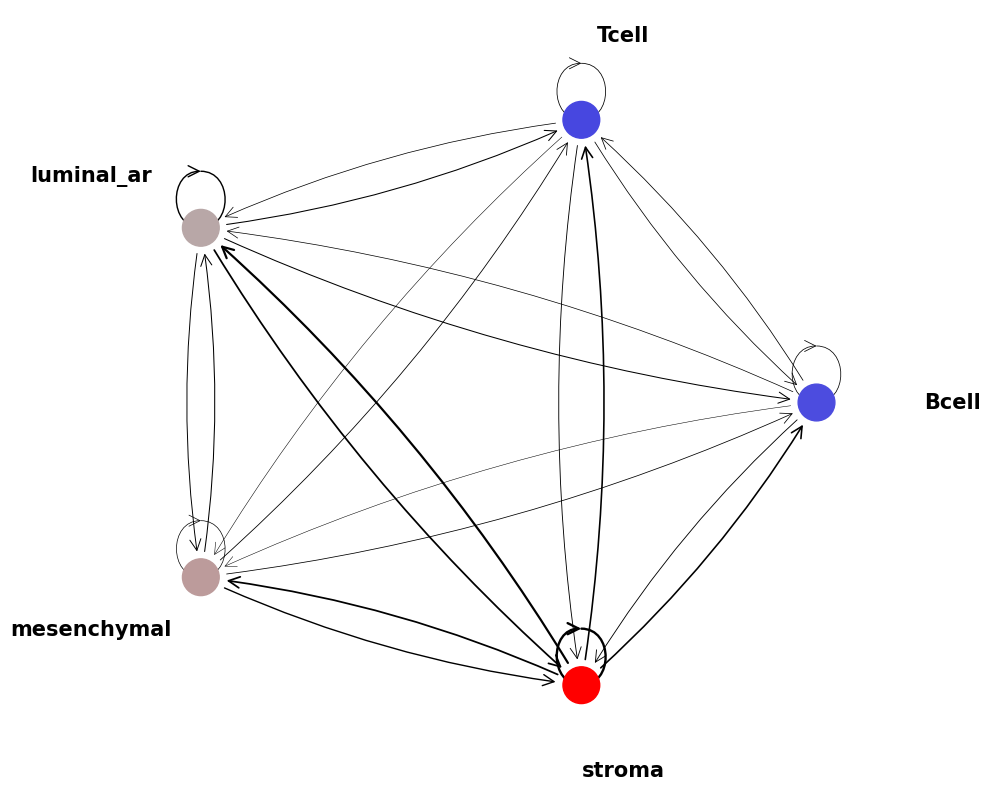

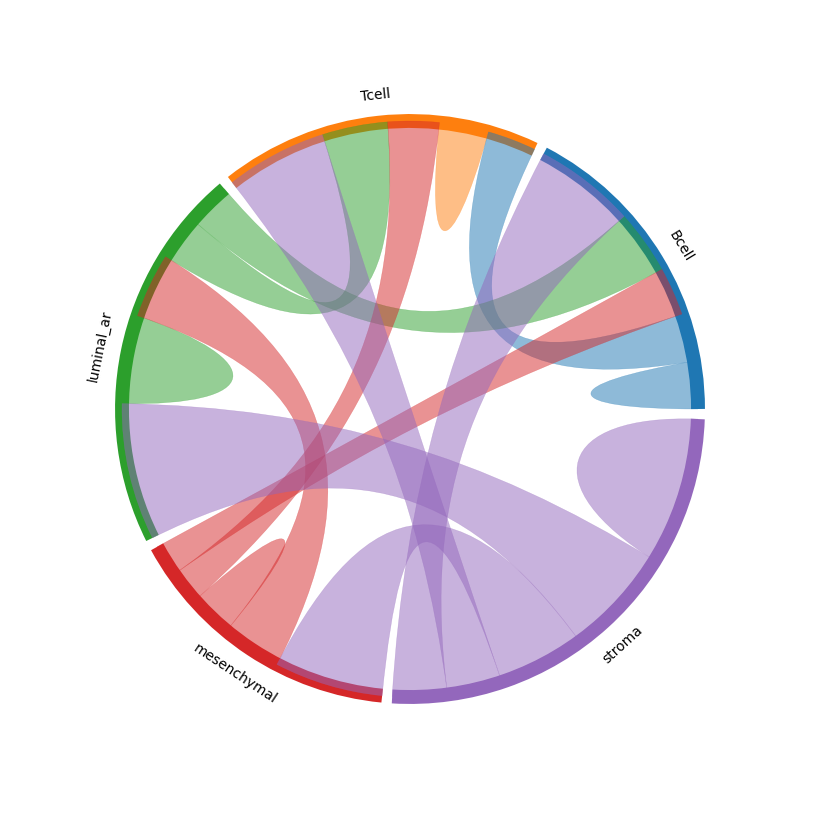

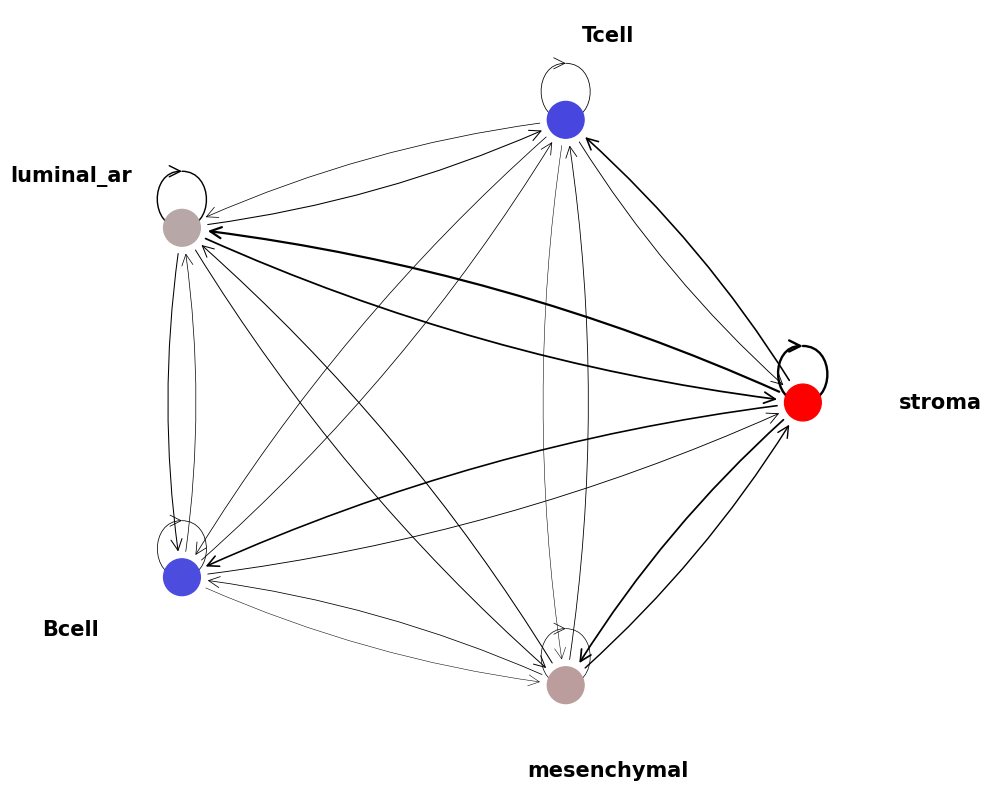

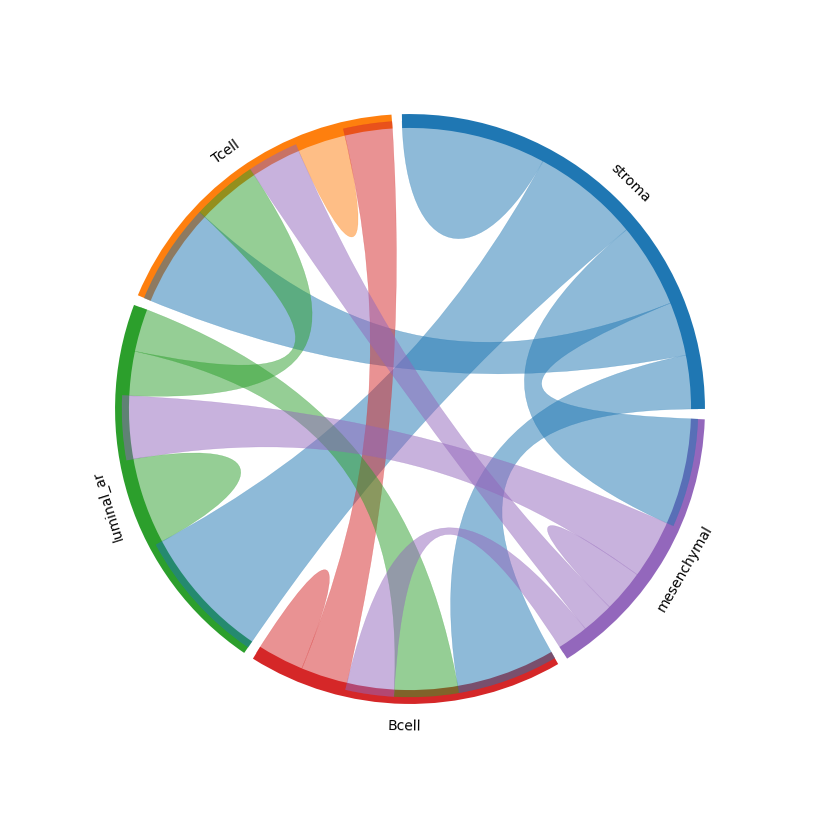

In [7]:
mmcci.plt.network_plot(squidpy_overalls[0])
mmcci.plt.chord_plot(squidpy_overalls[0])
mmcci.plt.network_plot(squidpy_overalls[1])
mmcci.plt.chord_plot(squidpy_overalls[1])
mmcci.plt.network_plot(squidpy_overalls[2])
mmcci.plt.chord_plot(squidpy_overalls[2])

lr_pairs = mmcci.it.get_majority_lr_pairs(squidpy_cci)
squidpy_avg = mmcci.it.get_avg_lr_pairs(squidpy_cci, lr_pairs)
squidpy_overall = mmcci.it.calculate_overall_interactions(squidpy_avg)
mmcci.plt.network_plot(squidpy_overall)
mmcci.plt.chord_plot(squidpy_overall)